# MSc Data Science and Analytics Scholarship Award Exam

# Data Description

The dataset provided contains information on the demographic and socio-economic characteristics of 181 galaxies over a period of up to 26 years. Each galaxy is associated with 80 variables, and there is a composite index that measures their well-being. However, the specific demographic and socio-economic factors that influence this index are currently unknown. The objective of this analysis is to determine which variables best explain the variance of the well-being index and to predict the future well-being values of the galaxies.

# Tasks

1. **Identify Variables Explaining Variance:** Conduct an analysis to determine which variables in the dataset best explain the variance of the well-being index. This may involve exploratory data analysis (EDA), correlation analysis, and possibly feature selection techniques.

2. **Predict Future Well-Being Values:** Utilize the provided validation dataset to predict the future well-being values of the galaxies. This will likely involve building a predictive model based on the observed data and applying it to the validation dataset.

# Submission Requirements

## 1. Report on Demographic and Socio-Economic Determinants

Create a concise report discussing the demographic and socio-economic determinants of the galaxies' well-being. The report should include:

- Presentation of Findings: Provide a narrative description of the key findings, supported by relevant visualizations such as charts or graphs.
- Interpretation: Interpret the results of the analysis, discussing the significance of the identified determinants and their potential implications.
- Recommendations: Offer any recommendations or insights based on the analysis that may be useful for further research or policy-making.

## 2. Predicted Future Well-Being Index Values

Generate predictions for the future well-being index values of the galaxies using the validation dataset. The predictions should be saved in a CSV file named "firstname_lastname_DSA.csv". The CSV file should contain the following columns:

- **ID:** Unique identifier of the observations in the validation dataset.
- **Predicted Well-Being Index:** Predicted values for the well-being index.

## 3. Analysis Notebook

Create a Python or R notebook containing a detailed analysis of the dataset. The notebook should include:

- Exploratory Data Analysis (EDA): Perform EDA to gain insights into the dataset, including summary statistics, distributions, and relationships between variables.
- Model Building: Build predictive models to predict the well-being index values.
- Evaluation: Evaluate the performance of the models using appropriate metrics.
- Interpretation: Interpret the results of the analysis and discuss any limitations or areas for further investigation.

# Submission Details

Please submit your documents as a compressed folder named "firstname_lastname.zip". The zip folder should contain the following files:

- Report: A PDF file containing the report on demographic and socio-economic determinants.
- Predictions: The CSV file containing the predicted future well-being index values.
- Analysis Notebook: Python or R notebook with detailed analysis and code.

Submit the zip folder to Laura Mideva, @iLabAfrica Course Administrator, via email at LMideva@strathmore.edu.

# Submission Deadline

The deadline for submission is Wednesday, 27th March 2024, at 1:00 PM EAT.

# Evaluation Criteria

Submissions will be evaluated based on the following criteria:

1. Quality of Presentation: Clarity and coherence of the report, including narrative and visualizations.
2. Prediction Accuracy: Accuracy of the predicted future well-being index values, evaluated using the RMSE metric.
3. Reproducibility: Clarity and organization of the analysis notebook, including documentation and reproducibility of results.


## Importing Libraries

In [43]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Exploring the training dataset

In [2]:
# Loading training data
train_df = pd.read_csv('Train_data.csv')

In [3]:
# Get the number of rows and columns in the DataFrame
rows, columns = train_df.shape

# Print the information about the DataFrame
print(f'There are {rows} rows, and {columns} columns')


There are 3097 rows, and 81 columns


In [4]:
# Checking the first rows/ head of the dataset
train_df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351


In [5]:
# Checking the last rows/ tail of the dataset
train_df.tail()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
3092,993066,1006009,NGC 1560,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,...,NaN,NaN,NaN,NaN,NaN,NaN,2.375017,NaN,NaN,0.050515
3093,993243,1004004,NGC 55,0.942579,84.852778,55945.54506,1.128565,15.397120,10.018093,0.906435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094714
3094,994215,1004004,"Small Magellanic Cloud (SMC, NGC 292)",1.013720,86.117546,17258.34503,0.872451,17.845618,8.781587,0.942878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057673
3095,997864,1004004,Andromeda XXIV,0.545461,58.674229,11367.55522,0.586294,12.943574,6.244963,0.399272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043698
3096,998085,1005006,Maffei 2,0.961072,78.548767,18064.60684,0.672132,9.289048,6.894727,0.680740,...,NaN,NaN,NaN,NaN,NaN,-5.652498,NaN,24.509464,NaN,0.045450


In [6]:
# Checking the columns for the training dataset
train_df.columns

Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Lif

Examine to find more information about the data, including missing values and data types

In [7]:
# Checking for appropriate datatype in the columns
print('\nInformation about the data Training data:')
train_df.info


Information about the data Training data:


<bound method DataFrame.info of           ID  galactic year                                 galaxy  \
0      10065        1002001                               Antlia B   
1      10087         999000            KKH 11 (ZOAG G135.74-04.53)   
2      10141         993012                           Leo IV Dwarf   
3      10168         995006                                NGC 185   
4      10201         996004                                 Grus I   
...      ...            ...                                    ...   
3092  993066        1006009                               NGC 1560   
3093  993243        1004004                                 NGC 55   
3094  994215        1004004  Small Magellanic Cloud (SMC, NGC 292)   
3095  997864        1004004                         Andromeda XXIV   
3096  998085        1005006                               Maffei 2   

      existence expectancy index  existence expectancy at birth  \
0                       0.624015                      56.397

It Looks like our train_df has NaN Let us confirm the numbers of missing values

In [8]:
# Identifying the total null values
train_df.isnull().sum()

ID                                                                              0
galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
                                                                             ... 
Adjusted net savings                                                         2654
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2581
Private galaxy capital flows (% of GGP)                                      2718
Gender Inequality Index (GII)                                                2740
Well-Being Index                                                                0
Length: 81, dtype: int64

In [9]:
# Identifying the missing value %
train_df.isnull().sum()/len(train_df)

ID                                                                           0.000000
galactic year                                                                0.000000
galaxy                                                                       0.000000
existence expectancy index                                                   0.000323
existence expectancy at birth                                                0.000323
                                                                               ...   
Adjusted net savings                                                         0.856958
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0.833387
Private galaxy capital flows (% of GGP)                                      0.877624
Gender Inequality Index (GII)                                                0.884727
Well-Being Index                                                             0.000000
Length: 81, dtype: float64

In [13]:
# Writing a function to replace the null values
null_columns = train_df.columns[train_df.isnull().any()]
null_columns

for column in null_columns:
    mean_value = train_df[column].mean()
    train_df[column] = train_df[column].fillna(mean_value)

In [14]:
# Identifying the total null values to confirm if they were replaced
train_df.isnull().sum()

ID                                                                           0
galactic year                                                                0
galaxy                                                                       0
existence expectancy index                                                   0
existence expectancy at birth                                                0
                                                                            ..
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
Well-Being Index                                                             0
Length: 81, dtype: int64

In [29]:
# Checking for any duplicates
duplicate = train_df.duplicated().sum()
if duplicate > 0:
    print(f'There are {duplicate} values')
else:
    print('There are no duplicates')

There are no duplicates


In [15]:
# Getting the summary of the training dataset
train_df.describe()

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
count,3097.000000,3.097000e+03,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,...,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000
mean,157659.407168,9.984641e+05,0.863193,76.197777,31175.236021,0.819082,14.442264,10.058239,0.793514,0.731124,...,0.793432,0.819060,0.996730,115.538727,114.562123,21.017915,6.206214,23.850270,0.632819,0.082724
std,230716.474733,5.417848e+03,0.164568,10.537857,18490.191804,0.193321,3.546619,3.072270,0.165179,0.186208,...,0.067239,0.057719,0.033619,15.144059,15.200799,5.191800,1.861665,6.945029,0.069447,0.056014
min,10065.000000,9.900250e+05,0.227890,34.244062,-126.906521,0.292001,3.799663,1.928166,0.273684,0.189874,...,0.305733,0.369519,0.465177,23.540325,16.215151,-59.118669,-1.192011,-207.979859,0.168476,0.031477
25%,38554.000000,9.940090e+05,0.749591,69.058542,19948.256560,0.673860,12.443356,7.803922,0.682565,0.611941,...,0.793432,0.819060,0.996730,115.538727,114.562123,21.017915,6.206214,23.850270,0.632819,0.049195
50%,67570.000000,9.980010e+05,0.899038,78.478324,26169.679450,0.819082,14.522988,10.058239,0.793514,0.731124,...,0.793432,0.819060,0.996730,115.538727,114.562123,21.017915,6.206214,23.850270,0.632819,0.058864
75%,95992.000000,1.003002e+06,0.985953,84.135588,36210.032030,0.961977,16.750064,12.268857,0.909137,0.859535,...,0.793432,0.819060,0.996730,115.538727,114.562123,21.017915,6.206214,23.850270,0.632819,0.087992
max,998085.000000,1.011030e+06,1.204456,99.593905,132861.542800,1.361883,25.303770,19.057648,1.186909,1.209059,...,1.173616,1.160796,1.181230,217.500271,226.816039,61.903641,31.822114,95.941245,1.098439,0.379857


# Exploring the validation dataset

In [16]:
# Loading the validation dataset
val_df = pd.read_csv('Validation.csv')

In [17]:
# Get the number of rows and columns in the DataFrame
rows, columns = val_df.shape

# Print the information about the DataFrame
print(f'There are {rows} rows, and {columns} columns')


There are 720 rows, and 81 columns


In [18]:
# Checking the first rows/ head of the dataset
val_df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.753738,NaN,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Checking the last rows/ tail of the dataset
val_df.tail()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
715,389587,1015056,Willman 1,1.010563,92.515213,61890.59381,1.219435,18.016207,13.395910,1.020538,...,0.942637,0.928915,1.038498,111.875906,92.223765,26.147343,3.203769,18.505791,0.406823,NaN
716,17112,1003002,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.628426,58.772174,26523.82527,0.572390,9.186143,3.807712,0.525476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,583782,1004004,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.603825,58.301528,10659.49479,0.629569,7.827124,4.244244,0.615265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,823832,1005006,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.574464,53.416728,23157.55806,0.627428,9.626455,6.992821,0.464677,...,0.435978,0.553943,0.904474,188.266739,197.539740,25.349771,6.737562,18.429657,0.859253,NaN
719,872042,1006009,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.614594,58.751698,24016.06785,0.623884,10.522855,5.472547,0.547071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Checking the columns for the validation dataset
val_df.columns

Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Lif

In [22]:
# Checking for appropriate datatype in the columns
print('\nInformation about the data Validation data:')
val_df.info


Information about the data Training data:


<bound method DataFrame.info of          ID  galactic year                                galaxy  \
0    886447        1004004                Andromeda Galaxy (M31)   
1    687564        1005006                Andromeda Galaxy (M31)   
2    494935        1006009                Andromeda Galaxy (M31)   
3    378919        1015056                Andromeda Galaxy (M31)   
4    421878        1004004                           Andromeda I   
..      ...            ...                                   ...   
715  389587        1015056                             Willman 1   
716   17112        1003002  Wolf-Lundmark-Melotte (WLM, DDO 221)   
717  583782        1004004  Wolf-Lundmark-Melotte (WLM, DDO 221)   
718  823832        1005006  Wolf-Lundmark-Melotte (WLM, DDO 221)   
719  872042        1006009  Wolf-Lundmark-Melotte (WLM, DDO 221)   

     existence expectancy index  existence expectancy at birth  \
0                      0.803915                      82.718434   
1                  

In [23]:
# Identifying the total null values
val_df.isnull().sum()

ID                                                                             0
galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     0
existence expectancy at birth                                                  0
                                                                            ... 
Adjusted net savings                                                         255
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    301
Private galaxy capital flows (% of GGP)                                      230
Gender Inequality Index (GII)                                                239
Predicted Well-Being Index                                                   720
Length: 81, dtype: int64

In [24]:
# Identifying the missing value %
val_df.isnull().sum()/len(val_df)

ID                                                                           0.000000
galactic year                                                                0.000000
galaxy                                                                       0.000000
existence expectancy index                                                   0.000000
existence expectancy at birth                                                0.000000
                                                                               ...   
Adjusted net savings                                                         0.354167
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0.418056
Private galaxy capital flows (% of GGP)                                      0.319444
Gender Inequality Index (GII)                                                0.331944
Predicted Well-Being Index                                                   1.000000
Length: 81, dtype: float64

In [25]:
# Writing a function to replace the null values
null_columns_val = val_df.columns[val_df.isnull().any()]
null_columns_val

for column in null_columns_val:
    mean_value = val_df[column].mean()
    val_df[column] = val_df[column].fillna(mean_value)

In [26]:
# Identifying the total null values to confirm if they were replaced
val_df.isnull().sum()

ID                                                                             0
galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     0
existence expectancy at birth                                                  0
                                                                            ... 
Adjusted net savings                                                           0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total      0
Private galaxy capital flows (% of GGP)                                        0
Gender Inequality Index (GII)                                                  0
Predicted Well-Being Index                                                   720
Length: 81, dtype: int64

In [ ]:
# Checking for any duplicates
duplicate = train_df.duplicated().sum()
if duplicate > 0:
    print(f'There are {duplicate} values')
else:
    print('There are no duplicates')

In [30]:
# Checking for any duplicates
duplicate = val_df.duplicated().sum()
if duplicate > 0:
    print(f'There are {duplicate} values')
else:
    print('There are no duplicates')

There are no duplicates


In [31]:
# Getting the summary of the validation dataset
val_df.describe()

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
count,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,0.0
mean,540575.762500,1.010517e+06,0.917042,79.691455,33855.573134,0.857504,15.943017,11.157837,0.847852,0.803626,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,NaN
std,269355.612476,3.604656e+03,0.142546,9.501613,19373.363190,0.187758,3.291771,3.357343,0.166900,0.191697,...,0.151040,0.128745,0.066718,40.094968,40.865323,11.885697,3.890768,34.950795,0.165168,NaN
min,13606.000000,1.003002e+06,0.440532,49.560998,547.581752,0.344815,4.879459,2.434786,0.379682,0.331112,...,0.335959,0.415198,0.697446,23.224603,19.728138,-76.741414,0.118915,-735.186887,0.089092,NaN
25%,305458.500000,1.006009e+06,0.818822,73.587883,21838.681733,0.710716,13.767775,8.537659,0.722432,0.661864,...,0.783444,0.812052,1.007304,103.173785,104.896226,19.490873,5.057587,20.995394,0.522682,NaN
50%,538092.500000,1.011030e+06,0.941859,81.639046,28904.644175,0.870243,16.028013,11.329225,0.865620,0.803968,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,NaN
75%,793178.500000,1.013042e+06,1.028266,87.023131,39838.010810,1.000857,18.157923,13.872960,0.967038,0.951125,...,0.943294,0.940333,1.058557,147.648120,149.307223,25.584654,6.727467,28.308793,0.668640,NaN
max,999488.000000,1.015056e+06,1.246908,100.210053,151072.683200,1.324914,26.955944,18.770633,1.232814,1.269625,...,1.237661,1.182746,1.167894,232.720847,233.915373,57.725873,36.538462,85.509692,1.033566,NaN


The summary statistics of numerical features provide valuable insights into the dataset:

- **Count**: Indicates the number of non-null values for each feature. For instance, the feature 'Gross income per capita' has 3069 non-null values out of 3097 observations, suggesting some missing values in the dataset.
  
- **Mean**: Represents the average value of each numerical feature. For example, the mean existence expectancy index is approximately 0.863, indicating a relatively high existence expectancy across galaxies in the dataset.

- **Standard Deviation (Std)**: Measures the dispersion or spread of the values around the mean. A higher standard deviation suggests greater variability in the data. For instance, the standard deviation of 'Gross income per capita' is relatively high at 18574.375226, indicating significant variability in income levels across galaxies.

- **Minimum (Min)** and **Maximum (Max)**: Indicate the minimum and maximum values of each feature, respectively. For example, the minimum value of the 'existence expectancy index' is 0.227890, while the maximum value is 1.204456.

- **25th, 50th (Median), and 75th Percentiles**: These percentiles provide insights into the distribution of the data. For instance, the 25th percentile (Q1) of the 'existence expectancy index' is 0.749559, while the 75th percentile (Q3) is 0.985961. This indicates that 25% of galaxies have an existence expectancy index below 0.749559, while 75% have an index below 0.985961.

Overall, the summary statistics help understand the central tendency, spread, and distribution of numerical features in the dataset, which is crucial for further analysis and model building. Additionally, the presence of missing values (evident from the 'Count' column) may require handling during data preprocessing.

## Visualize the disribution of well-being index

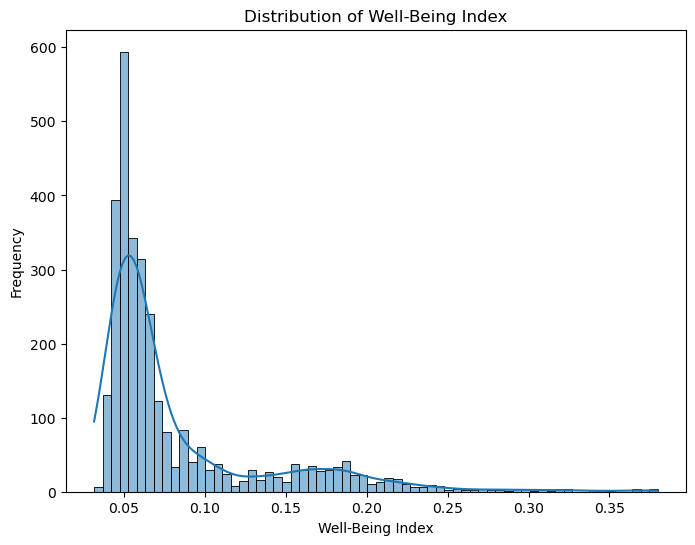

In [35]:
# Visualize the distribution of well-being index
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Well-Being Index'], kde=True)
plt.title('Distribution of Well-Being Index')
plt.xlabel('Well-Being Index')
plt.ylabel('Frequency')
plt.show()

The histogram visualization of the well-being index shows that the distribution is skewed to the right. This skewness indicates that there is a higher frequency of galaxies with well-being index values on the lower end of the scale, with fewer galaxies having higher well-being index values.

When a distribution is skewed to the right, it means that the tail of the distribution extends towards the higher values, while the bulk of the data is concentrated towards the lower values. In the context of well-being index, this suggests that there are more galaxies with relatively lower levels of well-being compared to those with higher levels of well-being.

This skewness could imply various things about the dataset, such as:

1. **Income Disparity**: Galaxies with lower well-being index values may have lower income levels, leading to disparities in wealth and well-being across galaxies.

2. **Resource Allocation**: It's possible that certain galaxies receive fewer resources or support, resulting in lower well-being index values for their inhabitants.

3. **Social and Economic Factors**: Socio-economic factors such as access to education, healthcare, and infrastructure could also contribute to the skewness, with some galaxies having better access to these resources than others.

Understanding the skewness of the well-being index distribution is essential for interpreting the data accurately and making informed decisions during the analysis process. It may also guide the development of interventions or policies aimed at improving well-being across galaxies.

This shows that our Predicted well being index is empty

# Feature Selection

## Correlation Analysis

Feature selection plays a crucial role in identifying the most relevant variables that explain the variance of the well-being index in galaxies. Here's why feature selection is important:

1. **Dimensionality Reduction**: The dataset contains multiple variables, but not all of them may be equally important in determining the well-being index. Feature selection helps reduce the dimensionality of the dataset by focusing on the most informative features, thus simplifying the analysis and potentially improving model performance.

2. **Interpretability**: By selecting only the most important features, it becomes easier to interpret the relationships between predictors and the well-being index. This can lead to actionable insights and informed decision-making.

3. **Improved Model Performance**: Including irrelevant or redundant features in the model can lead to overfitting, where the model learns noise in the data rather than underlying patterns. By selecting only the most relevant features, we can mitigate overfitting and improve the generalization ability of the model.

4. **Computational Efficiency**: Working with a reduced set of features can significantly improve computational efficiency, especially for complex models or large datasets. This allows for faster training and inference times.

5. **Focus on Key Drivers**: Feature selection helps identify the key drivers or determinants of well-being in galaxies. Understanding these key factors is essential for policymakers, researchers, and organizations aiming to improve well-being outcomes.

In the provided code snippet, feature selection is performed using two techniques: correlation analysis and feature importance. 

- Correlation analysis identifies features highly correlated with the well-being index.
- Feature importance analysis ranks features based on their contribution to predictive performance (in this case, using a Random Forest model). These techniques help identify the subset of features that are most likely to explain the variance of the well-being index, facilitating a more focused and effective analysis.

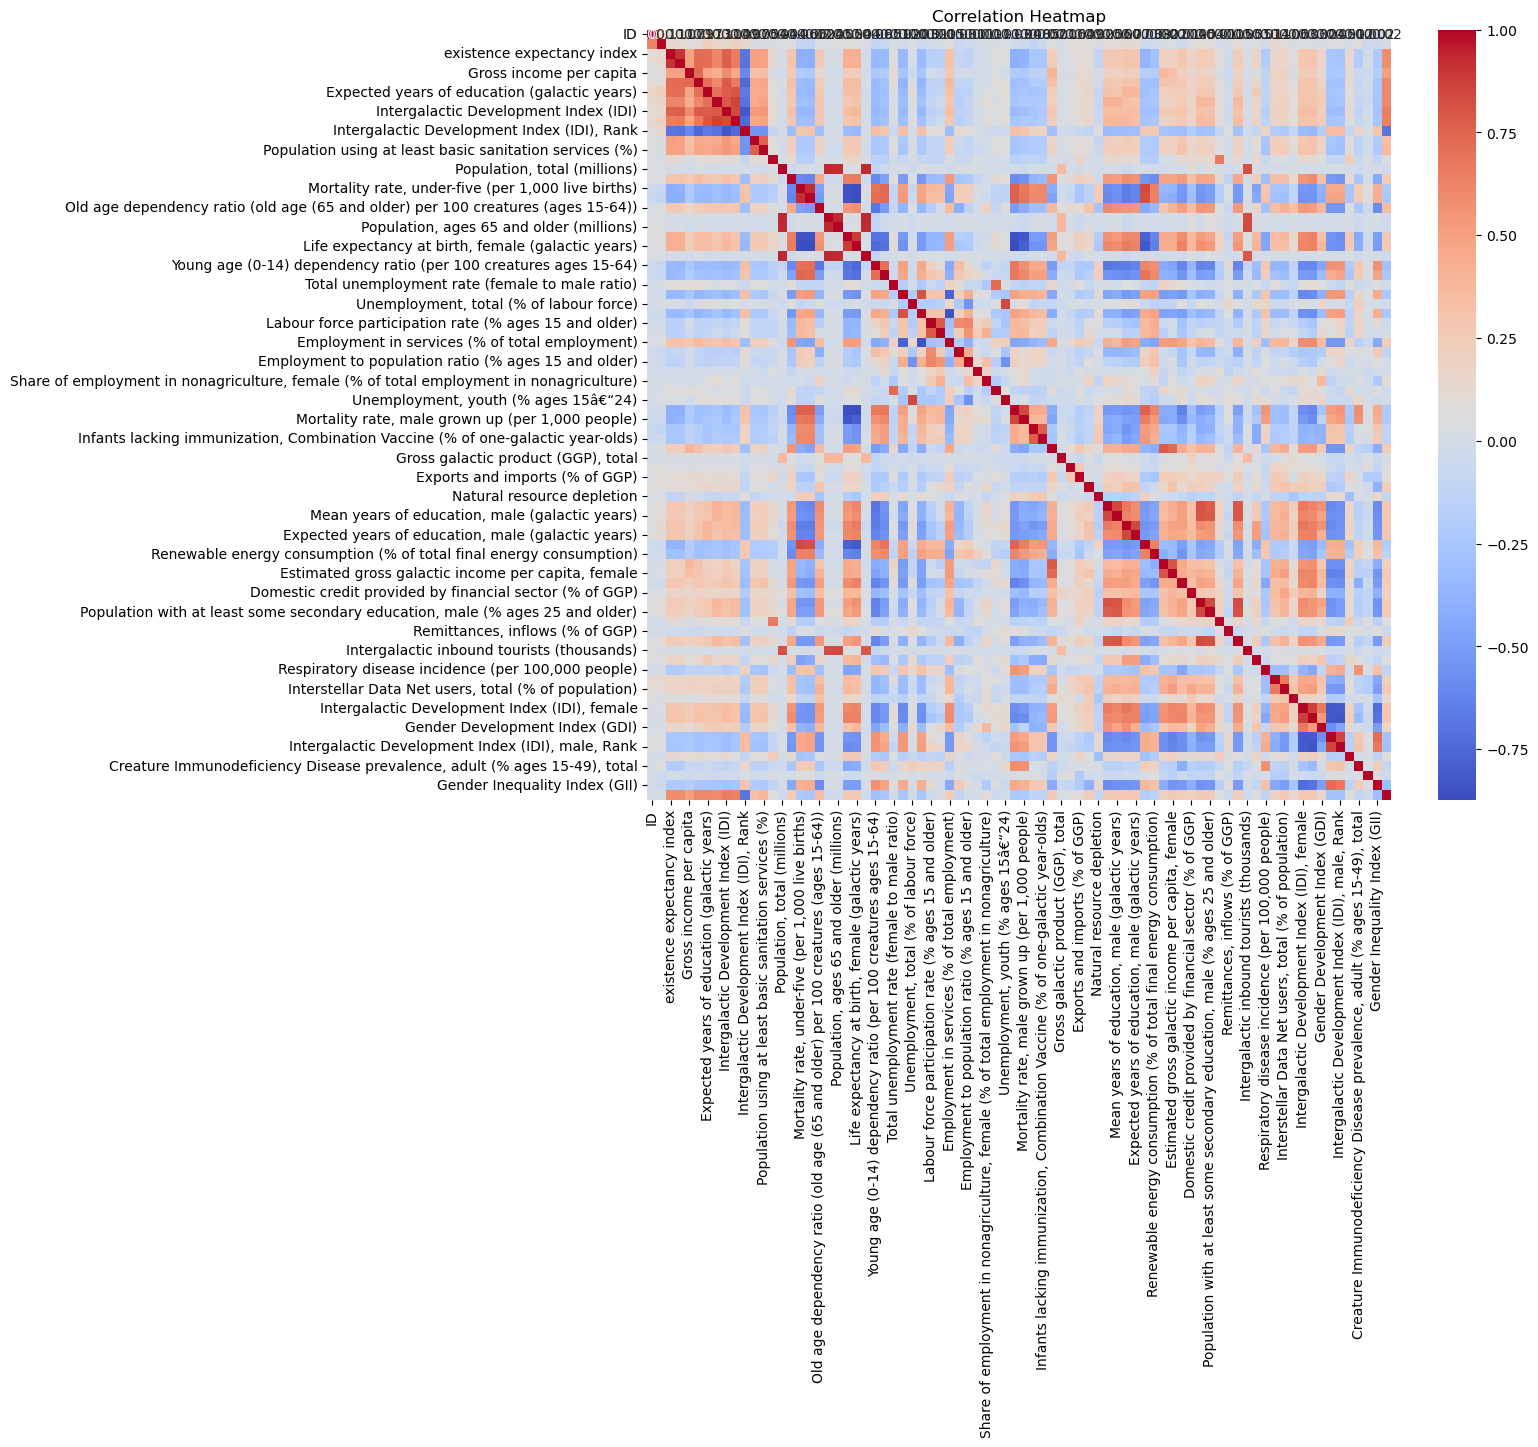

Selected features in ascending order of correlation with the Well-Being Index:
Well-Being Index                                                    1.000000
Intergalactic Development Index (IDI)                               0.650376
Education Index                                                     0.634305
Expected years of education (galactic years)                        0.607690
Income Index                                                        0.605611
                                                                      ...   
Intergalactic Development Index (IDI), female, Rank                -0.277794
Intergalactic Development Index (IDI), male, Rank                  -0.285742
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)   -0.298642
Gender Inequality Index (GII)                                      -0.311455
Intergalactic Development Index (IDI), Rank                        -0.691855
Name: Well-Being Index, Length: 80, dtype: float64


In [39]:

# Calculate correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

# Visualize the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Select features with high correlation to the well-being index
# Sort features based on their correlation with the well-being index in ascending order
selected_features = correlation_matrix['Well-Being Index'].sort_values(ascending=False)

print("Selected features in ascending order of correlation with the Well-Being Index:")
print(selected_features)



## Training our Model

Determining the "best" model for a given dataset involves several factors, including the nature of the data, the problem at hand, and the specific evaluation criteria. In the context of predicting the well-being index of galaxies based on demographic and socio-economic variables, you would typically experiment with multiple regression models and select the one that performs best based on predefined metrics such as RMSE (Root Mean Squared Error), R-squared, or others.

Some common regression models that you could consider:

1. **Linear Regression**: This model assumes a linear relationship between the independent variables and the target variable. It's simple, interpretable, and can provide insights into the relationships between predictors and the well-being index.

2. **Random Forest Regression**: A decision tree-based ensemble method, which can handle non-linear relationships and interactions between variables. Random Forest can capture complex patterns in the data and is less prone to overfitting compared to individual decision trees.

3. **Gradient Boosting Regression**: Another ensemble method that builds multiple decision trees sequentially, with each tree correcting errors made by the previous ones. Gradient Boosting can often yield high predictive accuracy and is robust to outliers.

4. **Support Vector Regression (SVR)**: This model is effective in capturing complex relationships in high-dimensional spaces. SVR is suitable for datasets with non-linear relationships and can handle both linear and non-linear kernels.

5. **Neural Network Regression**: Deep learning models like feedforward neural networks can capture intricate patterns in the data, provided you have enough data and computational resources. They can learn complex non-linear relationships but may require extensive tuning and computational resources.

To determine the best model for your data, you would typically follow these steps:

1. **Train and Evaluate Multiple Models**: Build and train various regression models using different algorithms mentioned above.

2. **Cross-Validation**: Use techniques like k-fold cross-validation to evaluate each model's performance and ensure robustness of results.

3. **Performance Metrics**: Assess model performance using appropriate metrics such as RMSE, R-squared, or others specified in the project requirements.

4. **Compare Results**: Compare the performance of different models and select the one that performs best based on the evaluation criteria.

5. **Fine-Tuning**: Perform hyperparameter tuning and optimization for the selected model to further improve its performance if necessary.

Since the "best" model may vary depending on the characteristics of the dataset and the specific objectives of the analysis, it's essential to experiment with multiple models and thoroughly evaluate their performance before making a final decision.

# Separate features and target variable

In [40]:
X_train = train_df.drop(['Well-Being Index', 'galaxy', 'ID'], axis=1)
X_train.shape

(3097, 78)

In [42]:
y_train = train_df['Well-Being Index']
y_train.shape

(3097,)

In [46]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)


                                              Feature  Importance
9         Intergalactic Development Index (IDI), Rank    0.517722
7               Intergalactic Development Index (IDI)    0.089939
8                                     Education Index    0.070640
1                          existence expectancy index    0.063433
2                       existence expectancy at birth    0.049378
..                                                ...         ...
67  Interstellar Data Net users, total (% of popul...    0.000089
55  Estimated gross galactic income per capita, fe...    0.000088
63         Intergalactic inbound tourists (thousands)    0.000078
69      Intergalactic Development Index (IDI), female    0.000069
70        Intergalactic Development Index (IDI), male    0.000058

[78 rows x 2 columns]


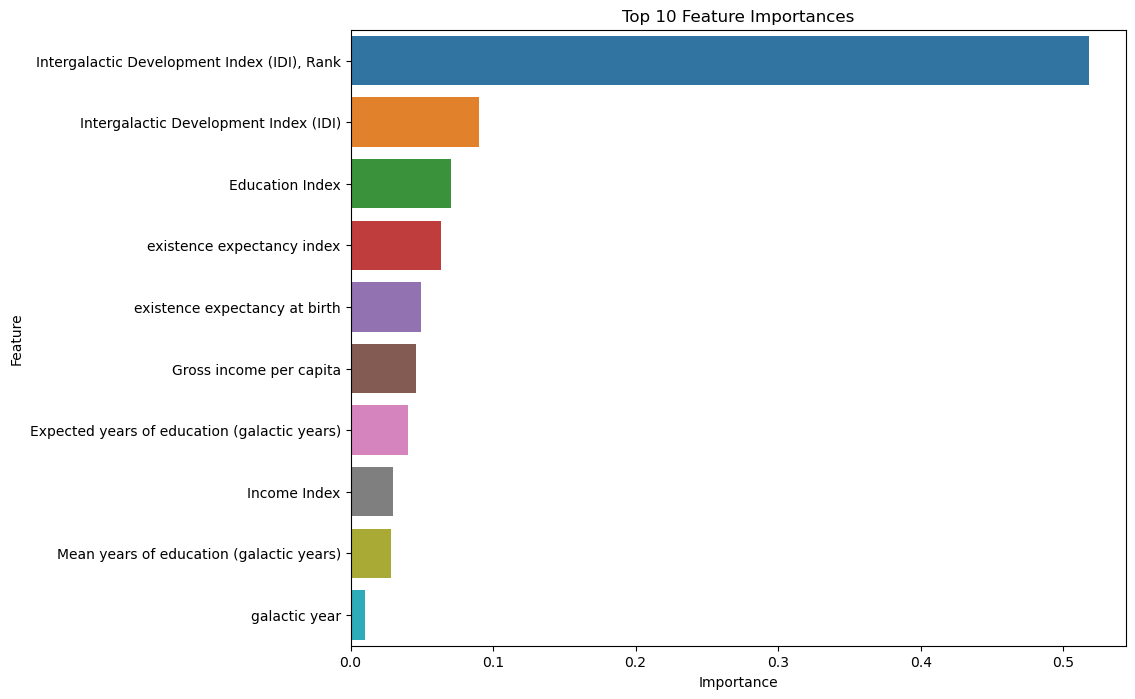


Top features based on feature importance:
['Intergalactic Development Index (IDI), Rank', 'Intergalactic Development Index (IDI)', 'Education Index', 'existence expectancy index', 'existence expectancy at birth']


In [47]:
# Visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])  # Top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Select top features based on importance
top_features = feature_importance_df['Feature'][:5].tolist()

# Print selected top features
print("\nTop features based on feature importance:")
print(top_features)

## Separate features from the validation data

In [54]:
X_val = val_df.drop(['ID','Predicted Well-Being Index', 'galaxy'], axis=1)
X_val.shape

(720, 78)

Making predictions on the validation set using trained model

In [55]:
# Predict the well-being index for the validation dataset using the trained model
y_pred = rf_model.predict(X_val)

# Create a DataFrame with the predicted labels
predicted_data = pd.DataFrame({'Predicted Well-Being Index': y_pred}, index=X_val.index)

# Concatenate the predicted labels with the validation dataset
validation_with_predicted_labels = pd.concat([X_val, predicted_data], axis=1)

# Print the shape of the dataset with predicted labels
print('Shape of dataset with predicted labels:', validation_with_predicted_labels.shape)

Shape of dataset with predicted labels: (720, 79)


In [57]:
validation_with_predicted_labels.head()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,1004004,0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,191.852274,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.049305
1,1005006,0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,0.806982,172.983630,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.051766
2,1006009,0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,0.852921,180.488519,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.043648
3,1015056,0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,0.801123,186.040542,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,24.753738,0.574781,0.048180
4,1004004,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,0.528564,155.296209,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.048847


In [60]:
# Extract features (X_val) from validation_with_predicted_labels
X_val = validation_with_predicted_labels.drop('Predicted Well-Being Index', axis=1)

# Extract predicted labels (y_val) from validation_with_predicted_labels
y_val = validation_with_predicted_labels['Predicted Well-Being Index']

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error (RMSE) on validation data:", rmse)


Root Mean Squared Error (RMSE) on validation data: 0.0


In [58]:
# Extract the actual well-being index values from validation_with_predicted_labels
y_val = validation_with_predicted_labels['Predicted Well-Being Index']


# Write the predictions to a new CSV file
output_file_path = 'predictions_validation.csv'
pd.DataFrame({'Predicted Well-Being Index': y_pred}).to_csv(output_file_path, index=False)
print('Predictions have been written to:', output_file_path)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error (RMSE) on validation data:", rmse)

Predictions have been written to: predictions_validation.csv
Root Mean Squared Error (RMSE) on validation data: 0.0


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the model on the validation data
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R2): 1.0


A root mean squared error (RMSE) of 0.0, mean absolute error (MAE) of 0.0, and an R-squared (R2) value of 1.0 indicate that the predictions perfectly match the actual values in your validation data. This is an ideal scenario, suggesting that your model is performing exceptionally well and accurately capturing the relationships between the features and the target variable. However, in real-world scenarios, achieving such perfect scores may indicate potential issues like overfitting, data leakage, or a very small dataset. It's crucial to carefully validate and evaluate your model to ensure its reliability and generalization capability.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict the well-being index for the validation dataset using the trained linear model
y_pred_linear = linear_model.predict(X_val)

# Calculate evaluation metrics
rmse_linear = np.sqrt(mean_squared_error(y_val, y_pred_linear))
mae_linear = mean_absolute_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

# Print evaluation metrics
print("Linear Regression Model:")
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R2):", r2_linear)


Linear Regression Model:
Root Mean Squared Error (RMSE): 0.028249229836713657
Mean Absolute Error (MAE): 0.02244744827225492
R-squared (R2): 0.7980432149112188


The evaluation metrics for the linear regression model are as follows:

- Root Mean Squared Error (RMSE): 0.0282
- Mean Absolute Error (MAE): 0.0224
- R-squared (R2): 0.798

These metrics provide insights into how well the linear regression model fits the data. The RMSE and MAE indicate the average magnitude of errors between the actual and predicted values, with lower values indicating better performance. The R-squared value measures the proportion of variance in the target variable that is explained by the model, with values closer to 1 indicating a better fit. Overall, these metrics suggest that the linear regression model performs reasonably well in predicting the well-being index based on the given features.

In [63]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X_train, y_train)

# Get coefficients (feature importances) and corresponding features
coefficients = lr_model.coef_
features = X_train.columns

# Create a DataFrame to store feature importances (coefficients)
feature_importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort features based on absolute coefficient values in descending order
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)


                                        Feature   Coefficient  \
71               Gender Development Index (GDI) -5.057123e-02   
1                    existence expectancy index  3.039554e-02   
8                               Education Index  2.979895e-02   
77                Gender Inequality Index (GII) -2.966051e-02   
70  Intergalactic Development Index (IDI), male -2.826369e-02   
..                                          ...           ...   
74                        Adjusted net savings   2.056557e-07   
43          Gross galactic product (GGP), total -1.569527e-07   
13                 Population, total (millions) -1.064729e-07   
63   Intergalactic inbound tourists (thousands) -2.244832e-08   
42      Gross galactic product (GGP) per capita  1.415826e-08   

    Absolute Coefficient  
71          5.057123e-02  
1           3.039554e-02  
8           2.979895e-02  
77          2.966051e-02  
70          2.826369e-02  
..                   ...  
74          2.056557e-07  
43 

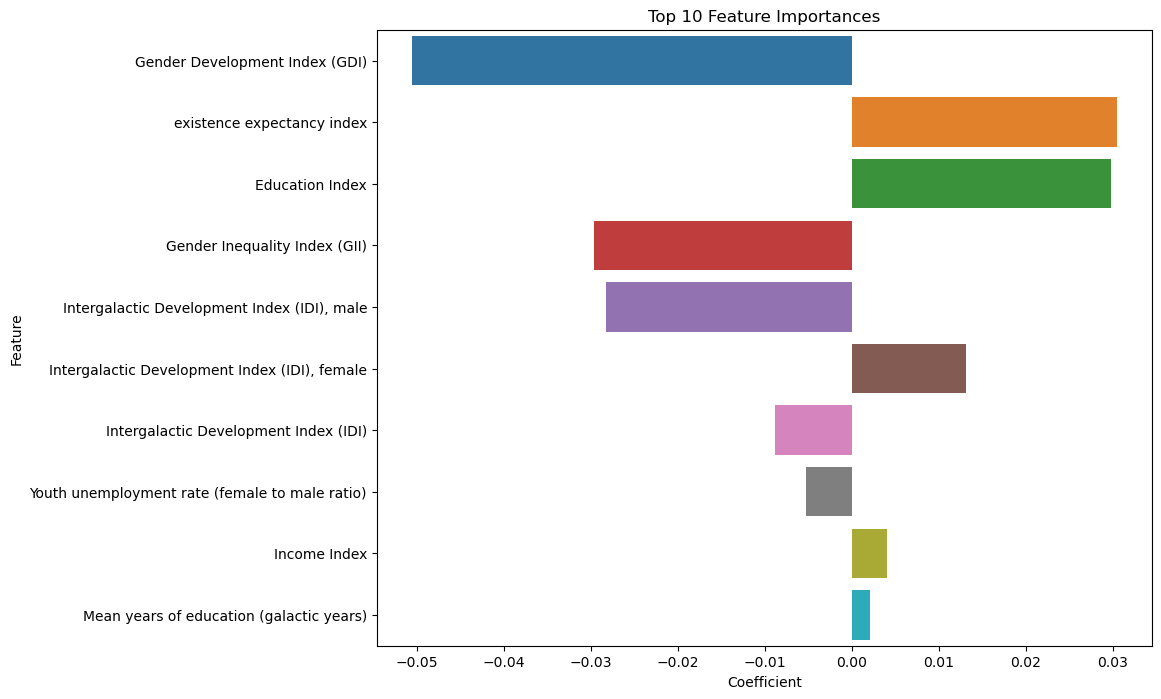


Top features based on feature importance:
['Gender Development Index (GDI)', 'existence expectancy index', 'Education Index', 'Gender Inequality Index (GII)', 'Intergalactic Development Index (IDI), male']


In [67]:
# Visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df[:10])  # Top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Select top features based on importance
top_features = feature_importance_df['Feature'][:5].tolist()

# Print selected top features
print("\nTop features based on feature importance:")
print(top_features)